In [ ]:
# for code details follow the following link:

# https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [1]:
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283838 sha256=6574e644b2240c4f31a8a526ddcff6f3c982dbdffce1f64585e9264faf5cccc1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau
import io
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

<ipython-input-2-0242e9364b38>:8: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import kendalltau


In [5]:
from google.colab import files
uploaded = files.upload()

Saving accidents_adj.csv to accidents_adj.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['accidents_adj (1).csv']))
df.head(4)

KeyError: ignored

In [ ]:
new_feature_names = {
    'Distance_mi': 'Distance',
    'Temperature_F': 'Temperature',
    'Wind_Chill_F': 'Wind',
    'Humidity': 'Humidity',
    'Pressure_in': 'Pressure',
    'Visibility_mi': 'Visibility',
    'Wind_Speed_mph': 'Wind Speed',
    'Precipitation_in': 'Precipitation',
    'HighLowSeverity': 'HighLowSeverity'
}

In [ ]:
df = df.rename(columns=new_feature_names)
df.head(4)

Distance  Temperature  Wind  Humidity  Pressure  Visibility  Wind Speed  \
0     1.011         81.0  81.0        42     29.11        10.0         8.0   
1     2.895         87.0  87.0        33     28.50        10.0         8.0   
2     0.043         32.0  32.0       100     29.26         2.0         0.0   
3     1.541         46.0  40.0        45     25.14        10.0        12.0   

   Precipitation  HighLowSeverity  
0           0.00                1  
1           0.00                0  
2           0.01                0  
3           0.00                0

In [ ]:
# Importing required method from sklearn
from sklearn.model_selection import train_test_split
# Let's keep the default size and states
#X = nn_df.drop('y', axis = 1)
X = df.drop(['HighLowSeverity'], axis = 1)
y = df['HighLowSeverity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(penalty='l2', max_iter = 10000, C=0.5, verbose = 5, n_jobs= -1)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X_train.columns)
X_train.head(2)

Distance  Temperature  Wind  Humidity  Pressure  Visibility  \
23990     0.456         82.0  82.0        69     28.76         9.0   
8729      5.905         66.0  66.0       100     29.88         9.0   

       Wind Speed  Precipitation  
23990         5.0           0.00  
8729         10.0           0.07

In [ ]:
logR.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(C=0.5, max_iter=10000, n_jobs=-1, verbose=5)

In [ ]:
i = 0
X_obs = X_train.iloc[[i],:]
X_obs

Distance  Temperature  Wind  Humidity  Pressure  Visibility  \
23990     0.456         82.0  82.0        69     28.76         9.0   

       Wind Speed  Precipitation  
23990         5.0            0.0

In [ ]:
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your training data and target variable
# Assuming X_test is your test data without feature names

# Manually assign feature names to X_test
#X_test.columns = ['x', 'y', 'z', 'm', 'n', 'o', 'r', 'b']

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Initialize the explainer with the correct feature names
explainer = LimeTabularExplainer(training_data=X_train.values, feature_names=X_train.columns, class_names=['0', '1'], discretize_continuous=True)

# Assuming you have already defined X_obs and logR for the LimeTabularExplainer
# Explain a prediction for a single instance
lime = explainer.explain_instance(X_obs.values[0], logR.predict_proba)

# Print the explanation
print('Instance:', i)
print('Prediction:', y_pred[i])
lime.show_in_notebook(show_table=True)


Mean Squared Error: 0.01944915677922754
Instance: 0
Prediction: 0.03704131856065125


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


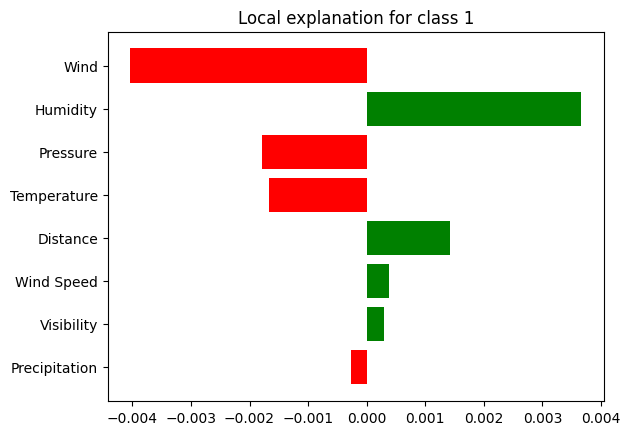

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Create LimeTabularExplainer with the correct parameters
explainer = LimeTabularExplainer(training_data=X_train.values, feature_names=X_train.columns, class_names=['0', '1'], discretize_continuous=False)

# Get Lime explanation
lime_explanation = explainer.explain_instance(X_obs.values[0], logR.predict_proba)

# Get the explanation as a pyplot figure
lime_fig = lime_explanation.as_pyplot_figure()


In [ ]:
import shap
shap.initjs() # jave script

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer_shap = shap.Explainer(model = logR, masker = X_train)
shap_values = explainer_shap.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


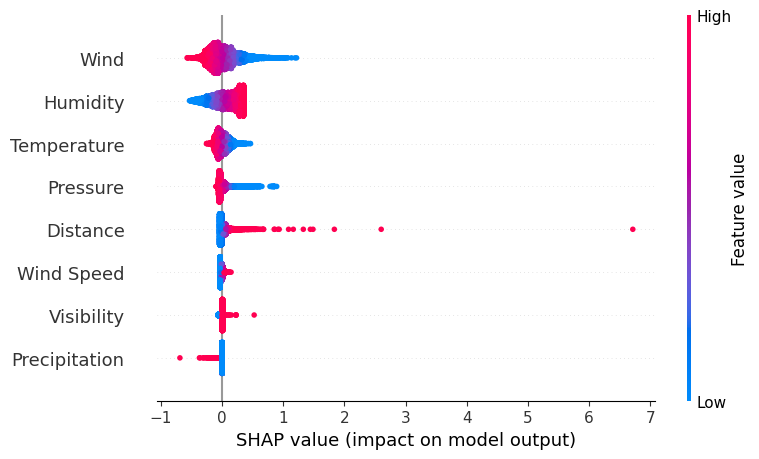

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.summary_plot(shap_values, X_test)

plt.savefig('waterfall_plot.png', dpi=550, bbox_inches='tight')

In [ ]:
print("The base value is: ", explainer_shap.expected_value)

The base value is:  -4.053993891889727


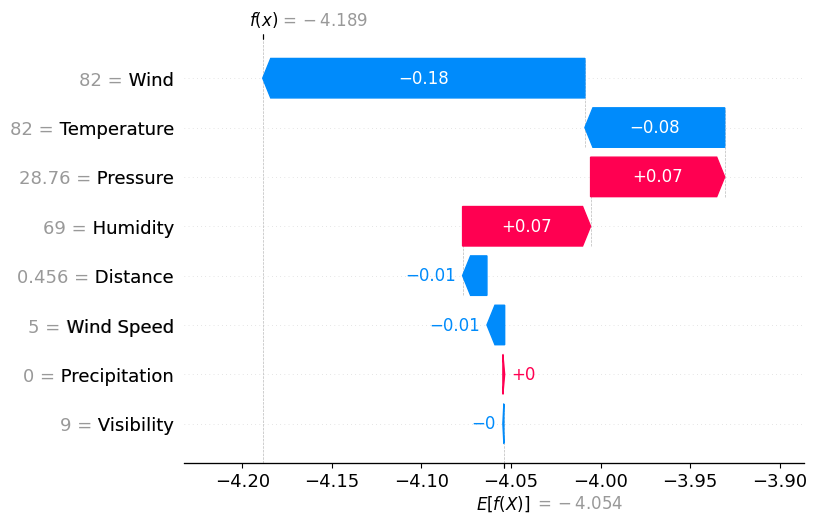

<Figure size 640x480 with 0 Axes>

In [ ]:
explainer = shap.Explainer(model = logR, masker = X_train)
shap_values = explainer_shap.shap_values(X_test)

explanation_object = explainer(X_train)
shap_values = explainer.shap_values(X_train)
# visualize the first prediction's explanation
shap.plots.waterfall(explanation_object[0])

plt.savefig('waterfall_plot.png', dpi=350, bbox_inches='tight')

In [ ]:
shap.initjs()
shap.force_plot(base_value=explainer_shap.expected_value,
                shap_values=shap_values[i,:],
                features=X_train.iloc[i,:])

In [ ]:
# Try this interactive force plot
#shap.initjs()
#shap.force_plot(base_value=explainer_shap.expected_value,shap_values=shap_values,features=X_train)

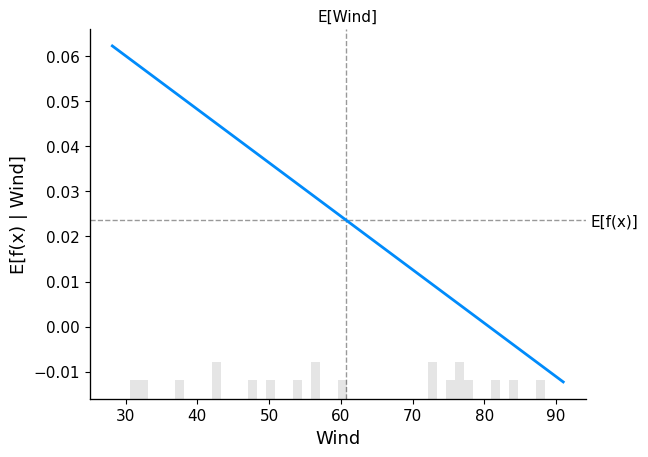

In [ ]:
# Draw sample of 200 observations
sample = shap.utils.sample(X=X, nsamples=20)

# Partial dependence plot for body-mass index variable
shap.partial_dependence_plot(

   ind='Wind',
   model=model.predict,
   data=sample,
   ice=False,
   model_expected_value=True,
   feature_expected_value=True
)

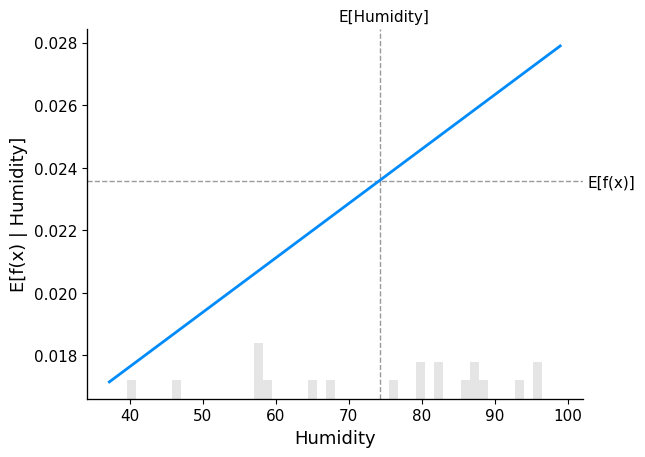

In [ ]:
# Draw sample of 200 observations
sample = shap.utils.sample(X=X, nsamples=20)

# Partial dependence plot for body-mass index variable
shap.partial_dependence_plot(

   ind='Humidity',
   model=model.predict,
   data=sample,
   ice=False,
   model_expected_value=True,
   feature_expected_value=True
)

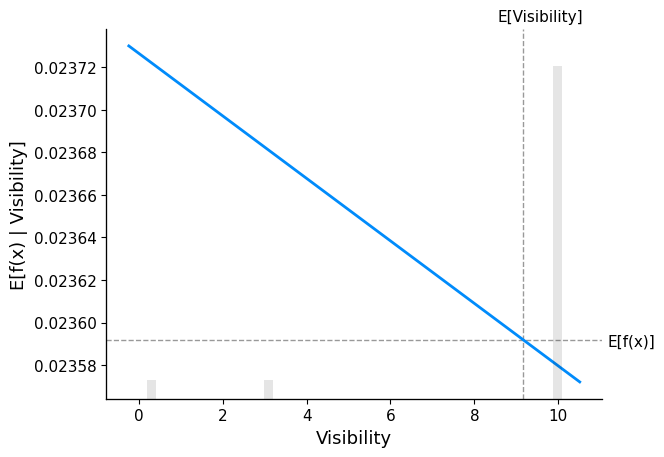

In [ ]:
# Draw sample of 200 observations
sample = shap.utils.sample(X=X, nsamples=20)

# Partial dependence plot for body-mass index variable
shap.partial_dependence_plot(

   ind='Visibility',
   model=model.predict,
   data=sample,
   ice=False,
   model_expected_value=True,
   feature_expected_value=True
)

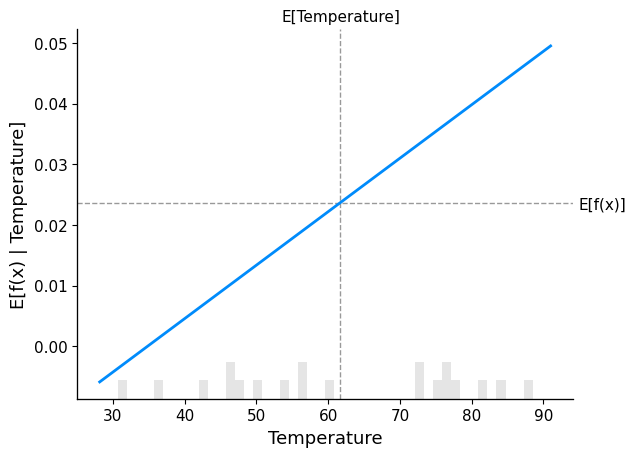

In [ ]:
# Draw sample of 200 observations
sample = shap.utils.sample(X=X, nsamples=20)

# Partial dependence plot for body-mass index variable
shap.partial_dependence_plot(

   ind='Temperature',
   model=model.predict,
   data=sample,
   ice=False,
   model_expected_value=True,
   feature_expected_value=True
)

# Seatpos data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving seatposR.csv to seatposR (1).csv


In [ ]:
!pip install lime
#!pip install vaderSentiment

# Import vader model and LIME for text
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from lime.lime_text import LimeTextExplainer

# Import numpy for formatting
import numpy as np

In [ ]:
# Install shap
!pip install shap

# Import dependencies
import shap
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['seatposR (1).csv']))

In [ ]:
# Importing required method from sklearn
from sklearn.model_selection import train_test_split
# Let's keep the default size and states
#X = nn_df.drop('y', axis = 1)
X = df.drop(['hipcenter'], axis = 1)
y = df['hipcenter']

# Instantiate model
model = LinearRegression()

# Fit model to data
model.fit(X=X, y=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

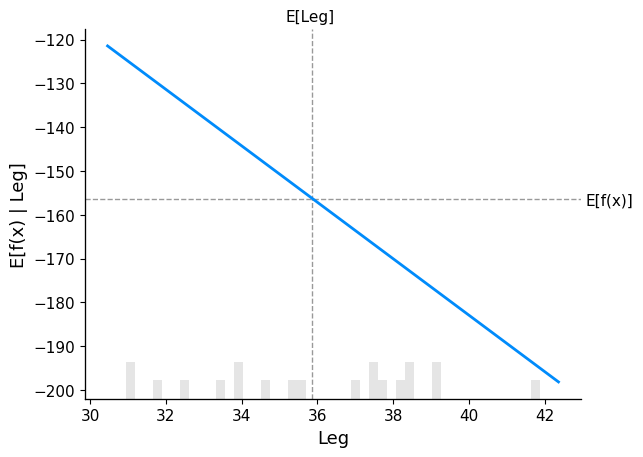

In [ ]:
# Draw sample of 20 observations
sample = shap.utils.sample(X=X, nsamples=20)

# Partial dependence plot for body-mass index variable
shap.partial_dependence_plot(

   ind='Leg',
   model=model.predict,
   data=sample,
   ice=False,
   model_expected_value=True,
   feature_expected_value=True
)

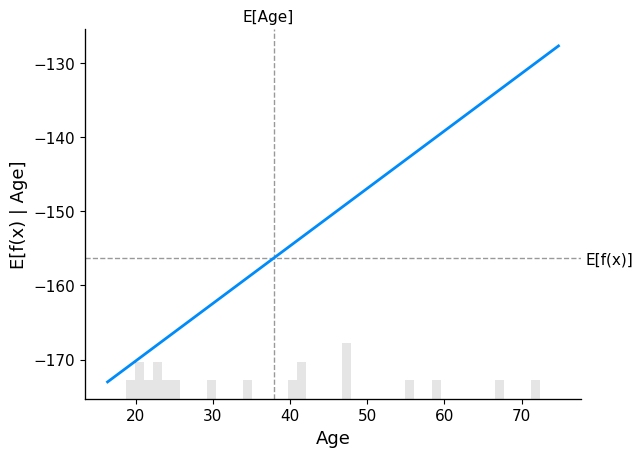

In [ ]:
# Draw sample of 20 observations
sample = shap.utils.sample(X=X, nsamples=20)

# Partial dependence plot for body-mass index variable
shap.partial_dependence_plot(

   ind='Age',
   model=model.predict,
   data=sample,
   ice=False,
   model_expected_value=True,
   feature_expected_value=True
)

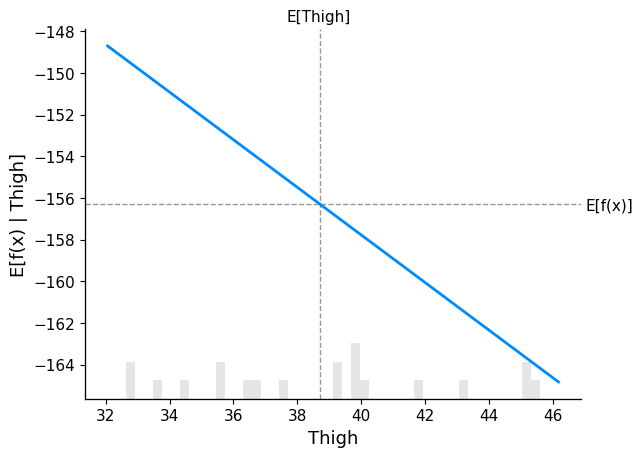

In [ ]:
# Draw sample of 20 observations
sample = shap.utils.sample(X=X, nsamples=20)

# Partial dependence plot for body-mass index variable
shap.partial_dependence_plot(

   ind='Thigh',
   model=model.predict,
   data=sample,
   ice=False,
   model_expected_value=True,
   feature_expected_value=True
)

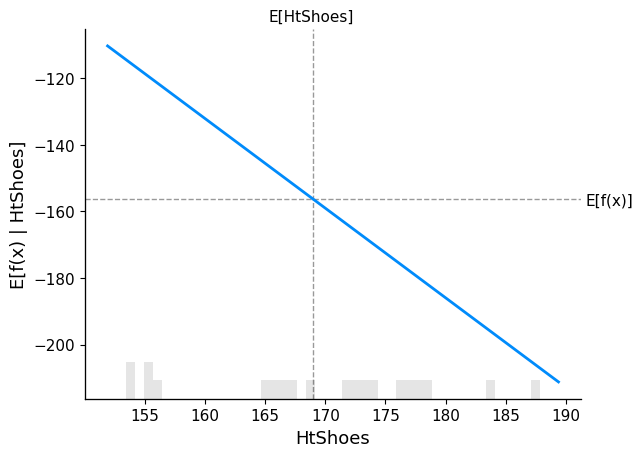

In [ ]:
# Draw sample of 20 observations
sample = shap.utils.sample(X=X, nsamples=20)

# Partial dependence plot for body-mass index variable
shap.partial_dependence_plot(

   ind='HtShoes',
   model=model.predict,
   data=sample,
   ice=False,
   model_expected_value=True,
   feature_expected_value=True
)

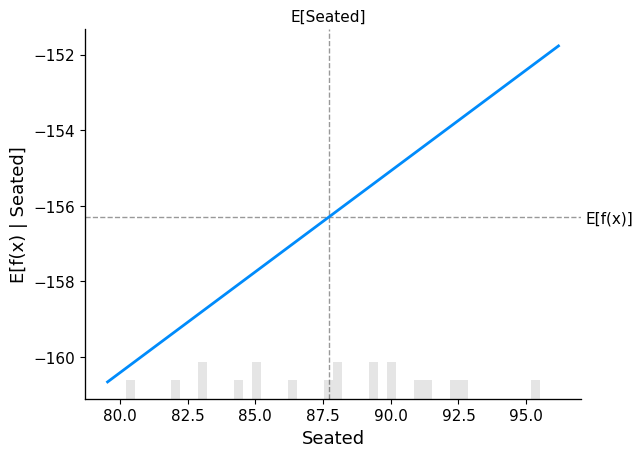

In [ ]:
# Draw sample of 20 observations
sample = shap.utils.sample(X=X, nsamples=20)

# Partial dependence plot for body-mass index variable
shap.partial_dependence_plot(

   ind='Seated',
   model=model.predict,
   data=sample,
   ice=False,
   model_expected_value=True,
   feature_expected_value=True
)

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(training_data=X_train.values,
                                 mode="regression",
                                 feature_names=X_train.columns)

In [ ]:
i = 10
X_obs = X_train.iloc[[i], :]

In [ ]:
import pandas as pd
import shap
import sklearn

#X,y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

Age = 0.77572
Weight = 0.02631
HtShoes = -2.69241
Ht = 0.60134
Seated = 0.53375
Arm = -1.32807
Thigh = -1.14312
Leg = -6.43905


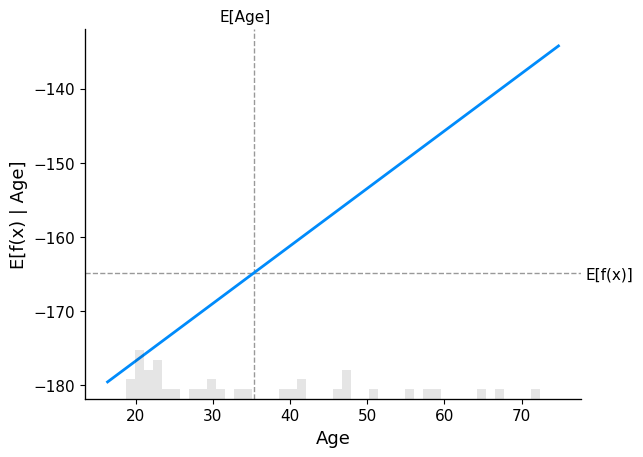

In [ ]:
shap.partial_dependence_plot(
    "Age", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

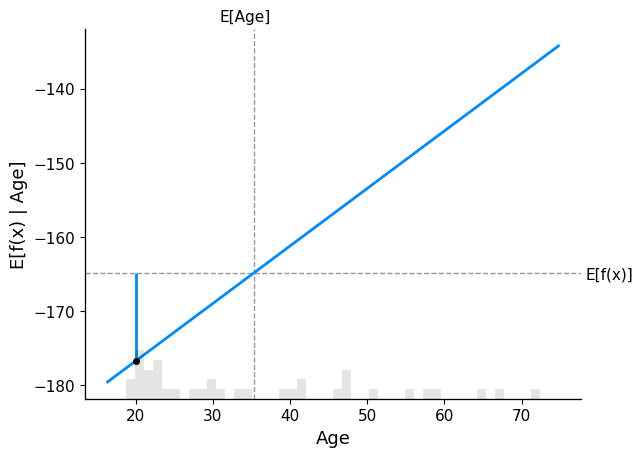

In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "Age", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

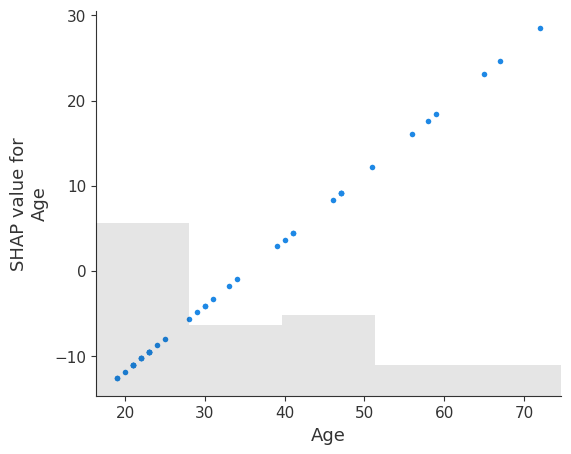

In [ ]:
shap.plots.scatter(shap_values[:,"Age"])

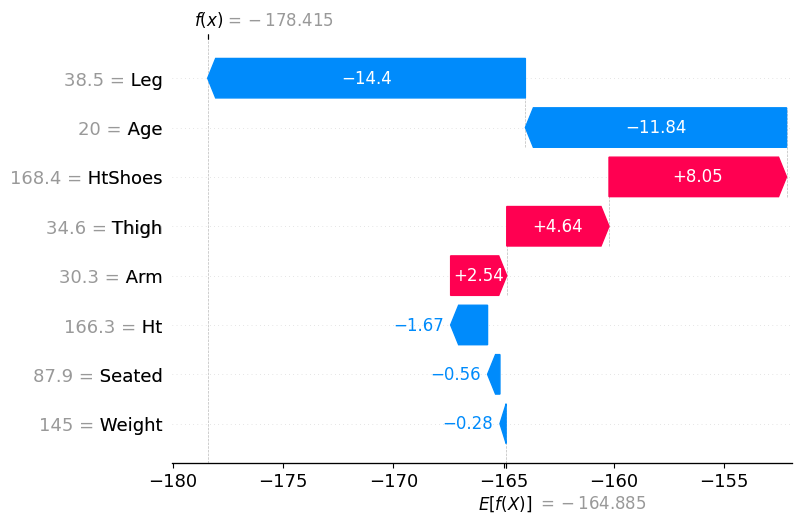

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [ ]:
pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


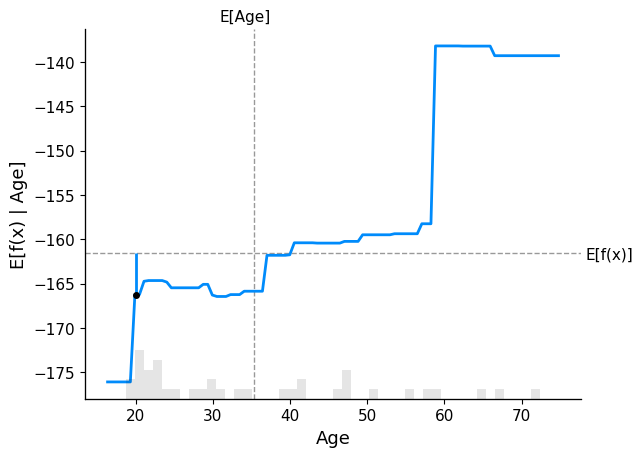

In [ ]:
# fit a GAM model to the data
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "Age", model_ebm.predict, X100, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)

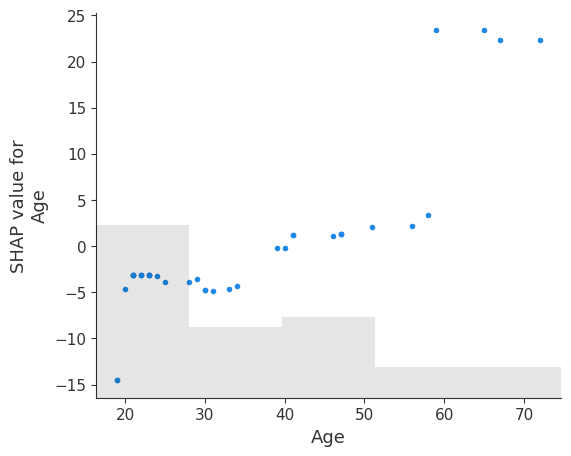

In [ ]:
shap.plots.scatter(shap_values_ebm[:,"Age"])


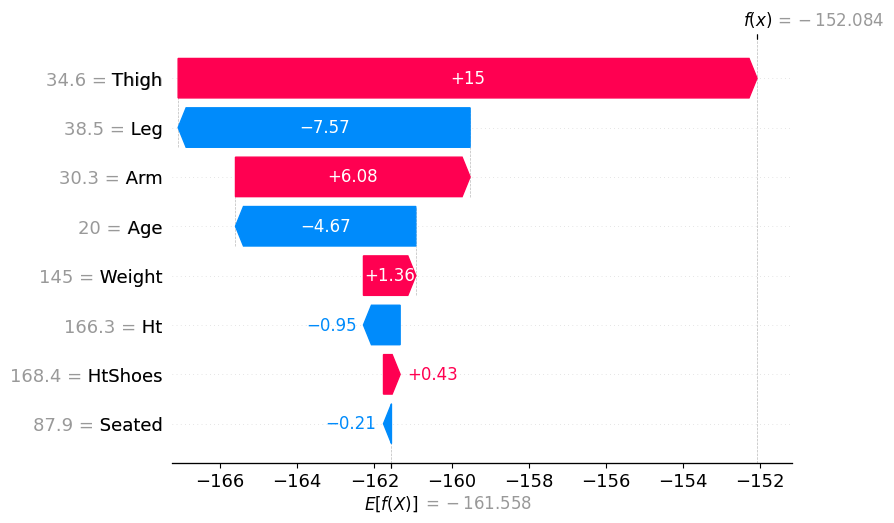

In [ ]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


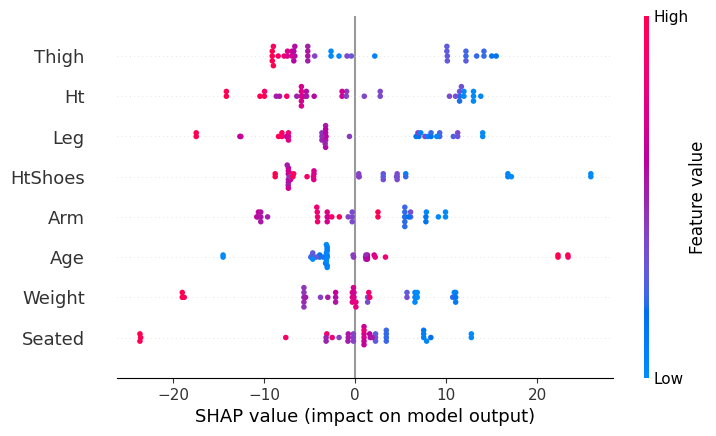

In [ ]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm)

X does not have valid feature names, but LogisticRegression was fitted with feature names


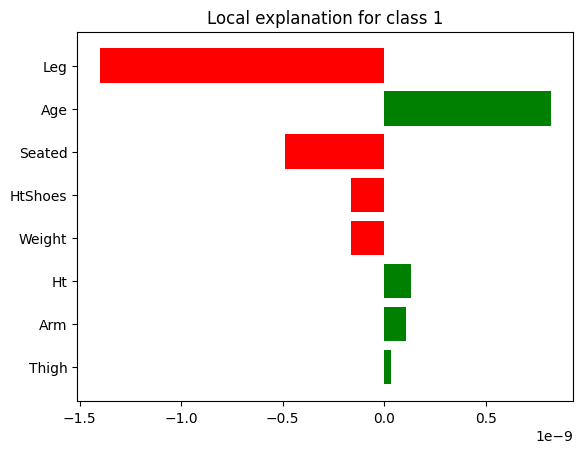

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Create LimeTabularExplainer with the correct parameters
explainer = LimeTabularExplainer(training_data=X_train.values, feature_names=X_train.columns, class_names=['0', '1'], discretize_continuous=False)

# Get Lime explanation
lime_explanation = explainer.explain_instance(X_obs.values[0], logR.predict_proba)

# Get the explanation as a pyplot figure
lime_fig = lime_explanation.as_pyplot_figure()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from lime.lime_tabular import LimeTabularExplainer

#####################
# Importing required method from sklearn
from sklearn.model_selection import train_test_split
# Let's keep the default size and states
#X = nn_df.drop('y', axis = 1)
X = df.drop(['hipcenter'], axis = 1)
y = df['hipcenter']

# Instantiate model
model = LinearRegression()

# Fit model to data
model.fit(X=X, y=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###################


# Load the dataset
#url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
#data = pd.read_csv(url)

# Split the data into features (X) and target (y)
#X = data.drop('medv', axis=1)
#y = data['medv']

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Initialize the explainer
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['hipcenter'], verbose=True, mode='regression')

# Explain a prediction
i = 2  # index of the instance to be explained
exp = explainer.explain_instance(X_test.values[i], model.predict, num_features=8)


 # Print the explanation
print('Instance:', i)
print('Prediction:', y_pred[i])
exp.show_in_notebook(show_table=True)

Mean Squared Error: 2869.607201085298
Intercept -170.93219882820867
Prediction_local [-171.23311476]
Right: -174.6944990363744
Instance: 2
Prediction: -174.69449903637457


X does not have valid feature names, but LinearRegression was fitted with feature names


X does not have valid feature names, but LogisticRegression was fitted with feature names


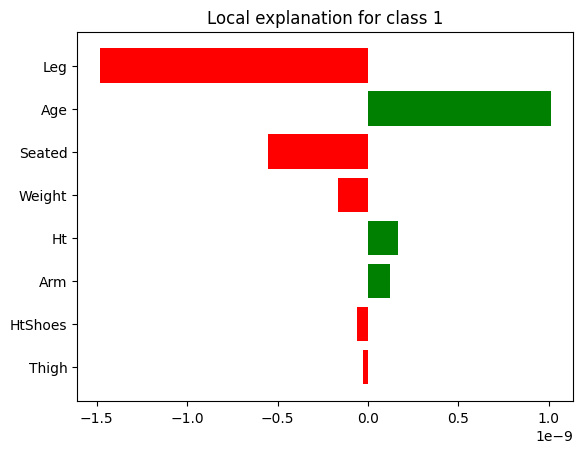

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Create LimeTabularExplainer with the correct parameters
explainer = LimeTabularExplainer(training_data=X_train.values, feature_names=X_train.columns, class_names=['0', '1'], discretize_continuous=False)

# Get Lime explanation
lime_explanation = explainer.explain_instance(X_obs.values[0], logR.predict_proba)

# Get the explanation as a pyplot figure
lime_fig = lime_explanation.as_pyplot_figure()
